<a href="https://colab.research.google.com/github/Kunaldahiya2907/Marketing-Research-Methods---Kunal-Dahiya_JioInstitute/blob/main/Reddit_Sentiment_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import praw
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Initialize the Reddit client
def initialize_reddit():
    return praw.Reddit(
        client_id='KC_J0ZSU4XW4yga-T7z7nw',       # Replace with your client ID
        client_secret='Udq6MxFz3uUS5yyZBG6nJbx2MA09LQ', # Replace with your client secret
        user_agent='Intrepid_Border_3664'       # Replace with your user agent
    )

# Scrape subreddit posts
def scrape_posts(reddit, subreddit_name, limit=1000):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for submission in subreddit.hot(limit=limit):
        posts.append({
            'title': submission.title,
            'score': submission.score,
            'id': submission.id,
            'url': submission.url,
            'num_comments': submission.num_comments,
            'created': submission.created,
            'body': submission.selftext
        })

    return pd.DataFrame(posts)

# Scrape comments for a specific post
def scrape_comments(reddit, post_id):
    submission = reddit.submission(id=post_id)
    submission.comments.replace_more(limit=None)

    comments = []
    for comment in submission.comments.list():
        comments.append({
            'comment_id': comment.id,
            'body': comment.body,
            'author': str(comment.author),
            'score': comment.score,
            'created': comment.created
        })

    return pd.DataFrame(comments)

# Perform sentiment analysis
def analyze_sentiment(text):
    if pd.isna(text):  # Handle missing or NaN values
        return 0  # Neutral sentiment
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Analyze sentiment of a CSV file
def analyze_csv_sentiment(input_csv, output_csv):
    # Load the data
    df = pd.read_csv(input_csv)

    # Apply sentiment analysis
    if 'body' in df.columns:
        df['sentiment'] = df['body'].apply(analyze_sentiment)
    else:
        print("The column 'body' is missing in the CSV. Sentiment analysis cannot be performed.")

    # Save the updated DataFrame to a new CSV
    df.to_csv(output_csv, index=False)
    print(f"Sentiment analysis results saved to {output_csv}")

    return df

# Plot sentiment over time
def plot_sentiment_over_time(df, time_column='created', sentiment_column='sentiment'):
    if time_column in df.columns and sentiment_column in df.columns:
        # Convert the time column to datetime
        df[time_column] = pd.to_datetime(df[time_column], unit='s')

        # Aggregate sentiment by date
        sentiment_over_time = df.groupby(df[time_column].dt.date)[sentiment_column].mean()

        # Plot the data
        plt.figure(figsize=(10, 6))
        sentiment_over_time.plot()
        plt.title('Sentiment Over Time')
        plt.xlabel('Date')
        plt.ylabel('Average Sentiment')
        plt.grid(True)
        plt.show()
    else:
        print(f"Missing columns '{time_column}' or '{sentiment_column}' in the DataFrame.")

# Main function
def main():
    reddit = initialize_reddit()

    # Scrape subreddit posts
    subreddit_name = 'uberdrivers'
    print(f"Scraping posts from r/{subreddit_name}...")
    posts_df = scrape_posts(reddit, subreddit_name, limit=1000)

    # Save posts to a CSV file
    posts_file = '/content/uberdrivers_posts.csv'
    posts_df.to_csv(posts_file, index=False)
    print(f"Saved posts to {posts_file}")

    # Perform sentiment analysis on the saved CSV file
    output_file = '/content/uberdrivers_posts_with_sentiment.csv'
    posts_with_sentiment = analyze_csv_sentiment(posts_file, output_file)

    # Plot sentiment over time
    print("Plotting sentiment over time...")
    plot_sentiment_over_time(posts_with_sentiment)

    # Scrape comments for the first post as an example
    if not posts_df.empty:
        first_post_id = posts_df.iloc[0]['id']
        print(f"Scraping comments for post ID: {first_post_id}")
        comments_df = scrape_comments(reddit, first_post_id)

        # Save comments to a CSV file
        comments_file = f'/content/{first_post_id}_comments.csv'
        comments_df.to_csv(comments_file, index=False)
        print(f"Saved comments to {comments_file}")

if __name__ == '__main__':
    main()


ModuleNotFoundError: No module named 'praw'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.5 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Scraping posts from r/uberdrivers...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Saved posts to /content/uberdrivers_posts.csv
Sentiment analysis results saved to /content/uberdrivers_posts_with_sentiment.csv
Plotting sentiment over time...


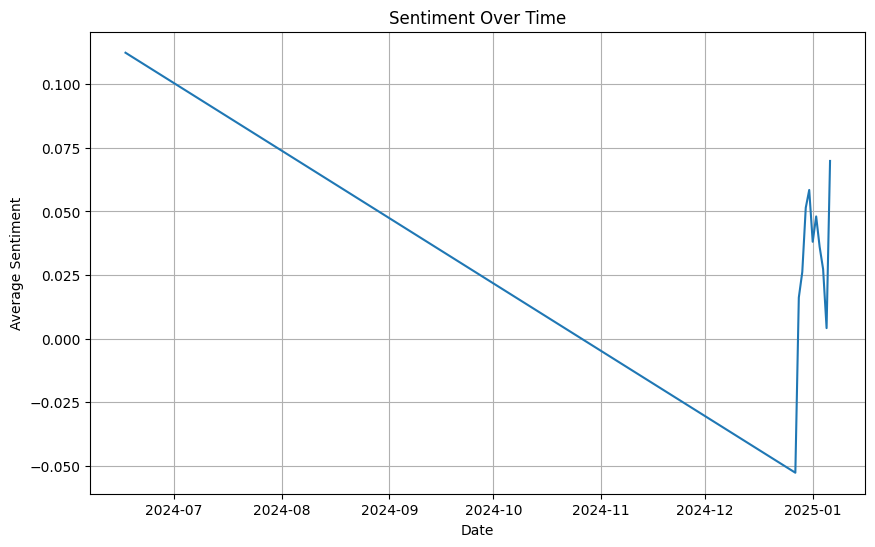

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Scraping comments for post ID: 1dhnmyb
Saved comments to /content/1dhnmyb_comments.csv


In [ ]:
# Install the required packages
!pip install praw
!pip install pandas
!pip install textblob
!pip install matplotlib

# Import the required libraries
import praw
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Initialize the Reddit client
def initialize_reddit():
    """
    Initializes and returns a PRAW Reddit client.

    Returns:
        praw.Reddit: A PRAW Reddit instance.
    """
    return praw.Reddit(
        client_id='KC_J0ZSU4XW4yga-T7z7nw',       # Replace with your client ID
        client_secret='Udq6MxFz3uUS5yyZBG6nJbx2MA09LQ', # Replace with your client secret
        user_agent='Intrepid_Border_3664'       # Replace with your user agent
    )

# Scrape subreddit posts
def scrape_posts(reddit, subreddit_name, limit=1000):
    """
    Scrapes posts from a specified subreddit.

    Args:
        reddit (praw.Reddit): The initialized PRAW Reddit instance.
        subreddit_name (str): The name of the subreddit to scrape.
        limit (int, optional): The maximum number of posts to retrieve. Defaults to 1000.

    Returns:
        pd.DataFrame: A DataFrame containing the scraped post data.
    """
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for submission in subreddit.hot(limit=limit):
        posts.append({
            'title': submission.title,
            'score': submission.score,
            'id': submission.id,
            'url': submission.url,
            'num_comments': submission.num_comments,
            'created': submission.created,
            'body': submission.selftext
        })

    return pd.DataFrame(posts)

# Scrape comments for a specific post
def scrape_comments(reddit, post_id):
    """
    Scrapes comments from a specific Reddit post.

    Args:
        reddit (praw.Reddit): The initialized PRAW Reddit instance.
        post_id (str): The ID of the post to scrape comments from.

    Returns:
        pd.DataFrame: A DataFrame containing the scraped comment data.
    """
    submission = reddit.submission(id=post_id)
    submission.comments.replace_more(limit=None)

    comments = []
    for comment in submission.comments.list():
        comments.append({
            'comment_id': comment.id,
            'body': comment.body,
            'author': str(comment.author),
            'score': comment.score,
            'created': comment.created
        })

    return pd.DataFrame(comments)

# Perform sentiment analysis
def analyze_sentiment(text):
    """
    Performs sentiment analysis on a given text.

    Args:
        text (str): The text to analyze.

    Returns:
        float: The sentiment polarity score (-1 to 1).
    """
    if pd.isna(text):  # Handle missing or NaN values
        return 0  # Neutral sentiment
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Analyze sentiment of a CSV file
def analyze_csv_sentiment(input_csv, output_csv):
    """
    Analyzes sentiment of a CSV file and saves the results to a new CSV.

    Args:
        input_csv (str): The path to the input CSV file.
        output_csv (str): The path to save the output CSV file.

    Returns:
        pd.DataFrame: A DataFrame containing the data with sentiment analysis results.
    """
    # Load the data
    try:
        df = pd.read_csv(input_csv)
    except FileNotFoundError:
        print(f"Error: Input CSV file '{input_csv}' not found.")
        return None  # Or handle the error appropriately

    # Apply sentiment analysis
    if 'body' in df.columns:
        df['sentiment'] = df['body'].apply(analyze_sentiment)
    else:
        print("The column 'body' is missing in the CSV. Sentiment analysis cannot be performed.")

    # Save the updated DataFrame to a new CSV
    df.to_csv(output_csv, index=False)
    print(f"Sentiment analysis results saved to {output_csv}")

    return df

# Plot sentiment over time
def plot_sentiment_over_time(df, time_column='created', sentiment_column='sentiment'):
    """
    Plots the sentiment over time.

    Args:
        df (pd.DataFrame): The DataFrame containing the sentiment data.
        time_column (str, optional): The name of the column with time information. Defaults to 'created'.
        sentiment_column (str, optional): The name of the sentiment column. Defaults to 'sentiment'.
    """
    if time_column in df.columns and sentiment_column in df.columns:
        # Convert the time column to datetime
        df[time_column] = pd.to_datetime(df[time_column], unit='s')

        # Aggregate sentiment by date
        sentiment_over_time = df.groupby(df[time_column].dt.date)[sentiment_column].mean()

        # Plot the data
        plt.figure(figsize=(10, 6))
        sentiment_over_time.plot()
        plt.title('Sentiment Over Time')
        plt.xlabel('Date')
        plt.ylabel('Average Sentiment')
        plt.grid(True)
        plt.show()
    else:
        print(f"Missing columns '{time_column}' or '{sentiment_column}' in the DataFrame.")

# Main function
def main():
    """
    Main function to orchestrate the Reddit data scraping, sentiment analysis, and plotting.
    """
    reddit = initialize_reddit()

    # Scrape subreddit posts
    subreddit_name = 'uberdrivers'
    print(f"Scraping posts from r/{subreddit_name}...")
    posts_df = scrape_posts(reddit, subreddit_name, limit=1000)

    # Check if any posts were scraped
    if posts_df.empty:
        print("No posts were found in the subreddit.")
        return  # Exit the function if no posts are available

    # Save posts to a CSV file
    posts_file = '/content/uberdrivers_posts.csv'
    posts_df.to_csv(posts_file, index=False)
    print(f"Saved posts to {posts_file}")

    # Perform sentiment analysis on the saved CSV file
    output_file = '/content/uberdrivers_posts_with_sentiment.csv'
    posts_with_sentiment = analyze_csv_sentiment(posts_file, output_file)

    if posts_with_sentiment is None:
      return
    # Plot sentiment over time
    print("Plotting sentiment over time...")
    plot_sentiment_over_time(posts_with_sentiment)

    # Scrape comments for the first post as an example
    first_post_id = posts_df.iloc[0]['id']
    print(f"Scraping comments for post ID: {first_post_id}")
    comments_df = scrape_comments(reddit, first_post_id)

    # Save comments to a CSV file
    comments_file = f'/content/{first_post_id}_comments.csv'
    comments_df.to_csv(comments_file, index=False)
    print(f"Saved comments to {comments_file}")

if __name__ == '__main__':
    main()